In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
# Área de trabalho do projeto
drive.mount('/content/drive')
workspace_path = '/content/drive/MyDrive/Workspace'

Mounted at /content/drive


In [3]:
# Caminho para os arquivos dos dados
data_path = f'{workspace_path}/fiap/pos-tech/data-analytics/fase-4'
data_path += '/deploy-de-aplicacoes/dados'

In [4]:
cadastrados = pd.read_csv(f'{data_path}/clientes-cadastrados.csv.tar.gz')
cadastrados.head()

,ID_Cliente,Genero,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,1,0,0,0,Segurança,2.0
3,5008808,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0
4,5008809,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0


In [5]:
cadastrados.shape

(438557, 18)

In [6]:
cadastrados['ID_Cliente'].value_counts()

,count
ID_Cliente,
7137299,2
7702238,2
7282535,2
7243768,2
7050948,2
...,...
5690727,1
6621262,1
6621261,1


In [7]:
id_repetidos = cadastrados[cadastrados['ID_Cliente'].duplicated(keep=False)]

In [8]:
df_cadastrados_limpo = cadastrados.drop(id_repetidos.index).copy()

In [9]:
df_cadastrados_limpo['ID_Cliente'].value_counts()

,count
ID_Cliente,
5008804,1
6147691,1
6147689,1
6147688,1
6147685,1
...,...
6093492,1
5690720,1
6538938,1


In [10]:
df_cadastrados_limpo.isna().sum()

,0
ID_Cliente,0
Genero,0
Tem_carro,0
Tem_casa_propria,0
Qtd_filhos,0
Rendimento_anual,0
Categoria_de_renda,0
Grau_escolaridade,0
Estado_civil,0
Moradia,0


In [11]:
df_cadastrados_limpo['Ocupacao'].unique()

array([nan, 'Segurança', 'Vendas', 'Contabilidade', 'Construção Civil',
       'Gerência', 'Motorista', 'Equipe principal', 'Alta tecnologia',
       'Limpeza', 'Serviço privado', 'Cozinha', 'Baixa qualificação',
       'Medicina', 'Secretariado', 'Garçom', 'RH', 'Corretor imobiliário',
       'TI'], dtype=object)

In [12]:
df_cadastrados_limpo.fillna({'Ocupacao': 'Outro'}, inplace=True)

In [13]:
df_cadastrados_limpo.isna().sum()

,0
ID_Cliente,0
Genero,0
Tem_carro,0
Tem_casa_propria,0
Qtd_filhos,0
Rendimento_anual,0
Categoria_de_renda,0
Grau_escolaridade,0
Estado_civil,0
Moradia,0


In [14]:
df_cadastrados_limpo.nunique()

,0
ID_Cliente,438463
Genero,2
Tem_carro,2
Tem_casa_propria,2
Qtd_filhos,12
Rendimento_anual,866
Categoria_de_renda,5
Grau_escolaridade,5
Estado_civil,5
Moradia,6


In [15]:
df_cadastrados_limpo.drop('Genero', axis=1, inplace=True)

In [16]:
df_cadastrados_limpo.drop('Tem_celular', axis=1, inplace=True)

In [17]:
df_cadastrados_limpo['Tem_carro'].unique()

array(['Y', 'N'], dtype=object)

In [18]:
df_cadastrados_limpo['Tem_casa_propria'].unique()

array(['Y', 'N'], dtype=object)

In [19]:
df_cadastrados_limpo['Tem_telefone_trabalho'].unique()

array([1, 0])

In [20]:
df_cadastrados_limpo['Tem_telefone_fixo'].unique()

array([0, 1])

In [21]:
df_cadastrados_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438463 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Tem_carro              438463 non-null  object 
 2   Tem_casa_propria       438463 non-null  object 
 3   Qtd_filhos             438463 non-null  int64  
 4   Rendimento_anual       438463 non-null  float64
 5   Categoria_de_renda     438463 non-null  object 
 6   Grau_escolaridade      438463 non-null  object 
 7   Estado_civil           438463 non-null  object 
 8   Moradia                438463 non-null  object 
 9   Idade                  438463 non-null  int64  
 10  Anos_empregado         438463 non-null  int64  
 11  Tem_telefone_trabalho  438463 non-null  int64  
 12  Tem_telefone_fixo      438463 non-null  int64  
 13  Tem_email              438463 non-null  int64  
 14  Ocupacao               438463 non-null  o

In [22]:
df_cadastrados_limpo['Tem_carro'] = df_cadastrados_limpo['Tem_carro'].replace({'Y': 1, 'N': 0})

<ipython-input-22-672ff44311d6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cadastrados_limpo['Tem_carro'] = df_cadastrados_limpo['Tem_carro'].replace({'Y': 1, 'N': 0})


In [23]:
df_cadastrados_limpo['Tem_casa_propria'] = df_cadastrados_limpo['Tem_casa_propria'].replace({'Y': 1, 'N': 0})

<ipython-input-23-7697b9e2a360>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cadastrados_limpo['Tem_casa_propria'] = df_cadastrados_limpo['Tem_casa_propria'].replace({'Y': 1, 'N': 0})


In [24]:
df_cadastrados_limpo['Idade'] = - df_cadastrados_limpo['Idade'] / 354.2425

In [25]:
df_cadastrados_limpo['Anos_empregado'] = - df_cadastrados_limpo['Anos_empregado'] / 354.2425

In [26]:
df_cadastrados_limpo.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,33.889214,12.821725,1,0,0,Outro,2.0
1,5008805,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,33.889214,12.821725,1,0,0,Outro,2.0
2,5008806,1,1,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,60.619491,3.201197,0,0,0,Segurança,2.0
3,5008808,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,53.946096,8.612744,0,1,1,Vendas,1.0
4,5008809,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,53.946096,8.612744,0,1,1,Vendas,1.0


In [27]:
df_cadastrados_limpo['Anos_empregado'].value_counts()

,count
Anos_empregado,
-1031.053586,75314
0.615398,262
4.736868,251
0.702908,241
2.760821,240
...,...
38.191352,1
28.858762,1
25.172022,1


In [28]:
df_cadastrados_limpo.loc[df_cadastrados_limpo['Anos_empregado'] < 0 , 'Anos_empregado'] = 0

In [29]:
df_cadastrados_limpo['Anos_empregado'].value_counts()

,count
Anos_empregado,
0.000000,75314
0.615398,262
4.736868,251
0.702908,241
2.760821,240
...,...
38.191352,1
28.858762,1
25.172022,1


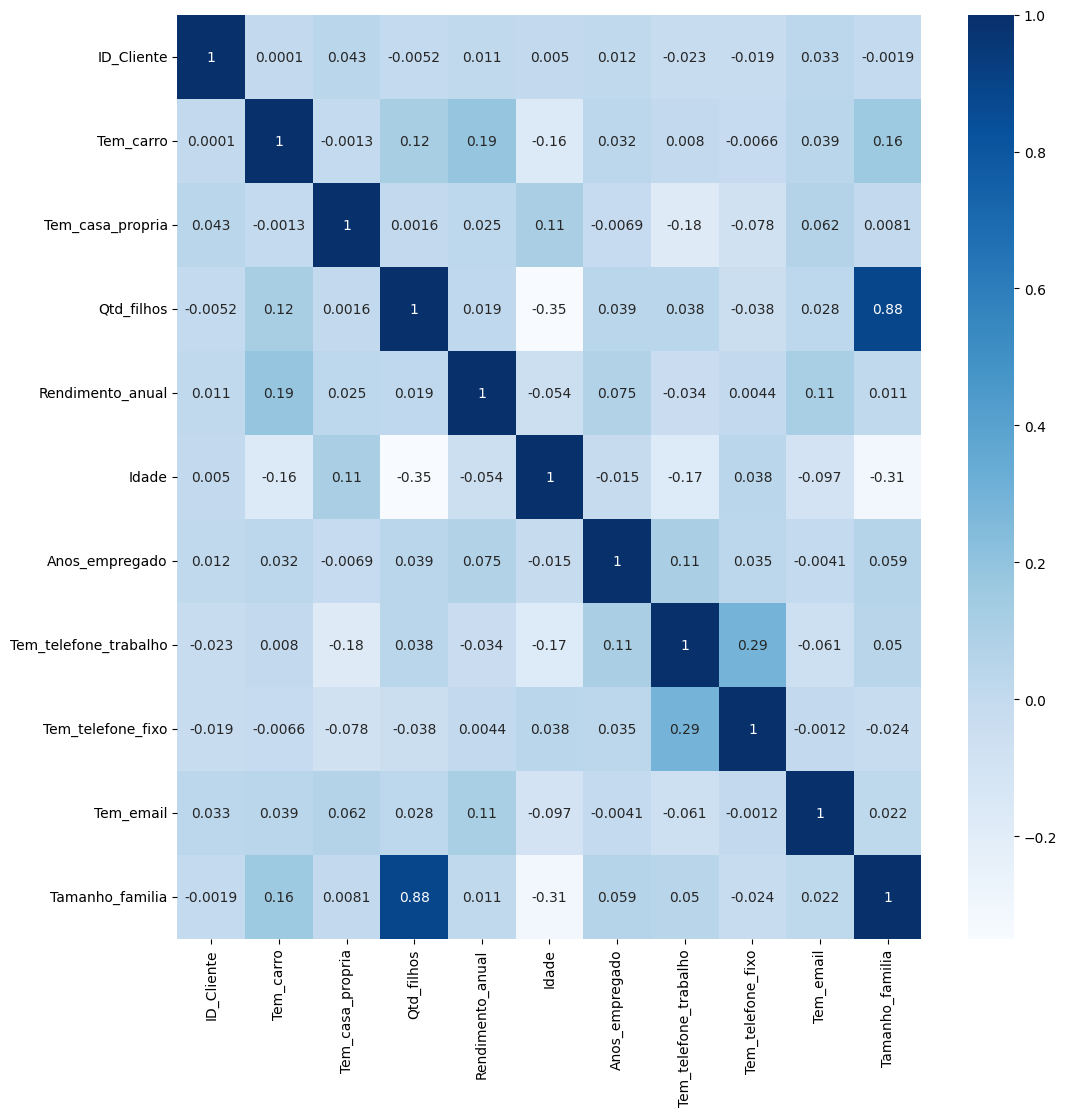

In [30]:
corr = df_cadastrados_limpo.corr(numeric_only=True)
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

In [31]:
df_cadastrados_limpo.drop(['Qtd_filhos'], axis=1, inplace=True)

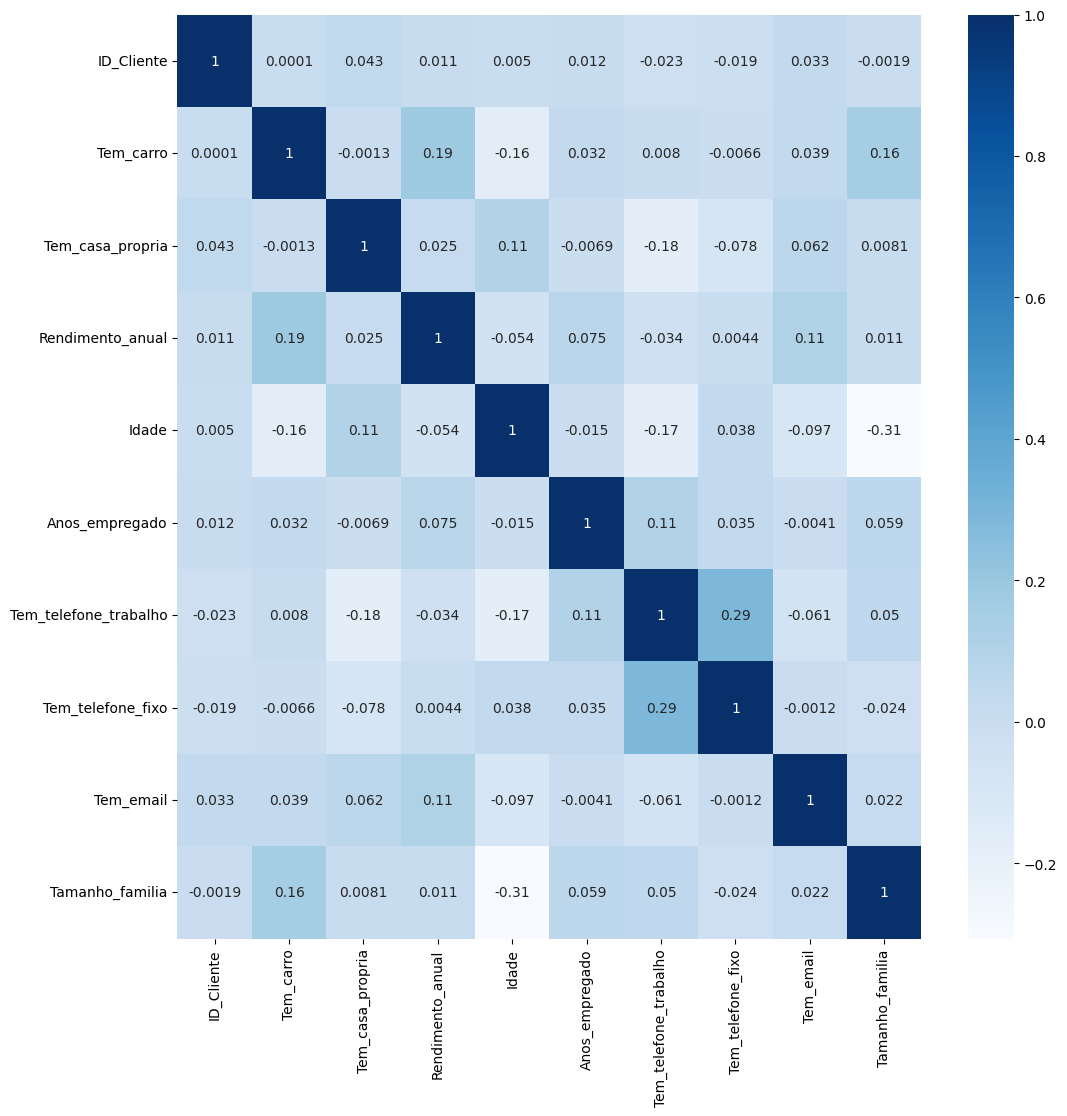

In [32]:
corr = df_cadastrados_limpo.corr(numeric_only=True)
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

In [33]:
df_cadastrados_limpo.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,1,1,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,33.889214,12.821725,1,0,0,Outro,2.0
1,5008805,1,1,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,33.889214,12.821725,1,0,0,Outro,2.0
2,5008806,1,1,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,60.619491,3.201197,0,0,0,Segurança,2.0
3,5008808,0,1,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,53.946096,8.612744,0,1,1,Vendas,1.0
4,5008809,0,1,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,53.946096,8.612744,0,1,1,Vendas,1.0


In [34]:
df_cadastrados_limpo = df_cadastrados_limpo[['ID_Cliente', 'Tem_carro',
                                             'Tem_casa_propria',
                                             'Tem_telefone_trabalho',
                                             'Tem_telefone_fixo', 'Tem_email',
                                             'Tamanho_familia',
                                             'Rendimento_anual', 'Idade',
                                             'Anos_empregado',
                                             'Categoria_de_renda',
                                             'Grau_escolaridade',
                                             'Estado_civil', 'Moradia',
                                             'Ocupacao']]

In [35]:
df_cadastrados_limpo.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao
0,5008804,1,1,1,0,0,2.0,427500.0,33.889214,12.821725,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro
1,5008805,1,1,1,0,0,2.0,427500.0,33.889214,12.821725,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro
2,5008806,1,1,0,0,0,2.0,112500.0,60.619491,3.201197,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Segurança
3,5008808,0,1,0,1,1,1.0,270000.0,53.946096,8.612744,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas
4,5008809,0,1,0,1,1,1.0,270000.0,53.946096,8.612744,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas


In [36]:
df_cadastrados_limpo['Categoria_de_renda'].value_counts(normalize=True)*100

,proportion
Categoria_de_renda,
Empregado,51.557144
Associado comercial,22.972520
Pensionista,17.214223
Servidor público,8.252236
Estudante,0.003877
